# Machine Learning


## Random Forest

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
from sklearn.metrics import classification_report , confusion_matrix

## Random Forest as Regressor

In [2]:
# Display max rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
# Let's Load the dataset
df = sns.load_dataset("taxis")
print(df.head())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

In [4]:
# Getting basic info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [5]:
# Let's check for missing values in our dataset
print(df.isnull().sum().sort_values(ascending=False))

dropoff_zone       45
dropoff_borough    45
payment            44
pickup_zone        26
pickup_borough     26
pickup              0
tip                 0
fare                0
distance            0
passengers          0
dropoff             0
color               0
tolls               0
total               0
dtype: int64


In [6]:
# Let's looking columns that contain missing values
print(df[["dropoff_zone",
"dropoff_borough",
"payment",         
"pickup_zone",
"pickup_borough"]].head())

            dropoff_zone dropoff_borough      payment            pickup_zone  \
0    UN/Turtle Bay South       Manhattan  credit card        Lenox Hill West   
1  Upper West Side South       Manhattan         cash  Upper West Side South   
2           West Village       Manhattan  credit card          Alphabet City   
3         Yorkville West       Manhattan  credit card              Hudson Sq   
4         Yorkville West       Manhattan  credit card           Midtown East   

  pickup_borough  
0      Manhattan  
1      Manhattan  
2      Manhattan  
3      Manhattan  
4      Manhattan  


In [7]:
from sklearn.impute import SimpleImputer

# List of columns to impute
cat_cols = ['dropoff_zone', 'dropoff_borough', 'payment', 'pickup_zone', 'pickup_borough']

# Create the imputer for mode
imputer = SimpleImputer(strategy='most_frequent')

# Impute each column
df[cat_cols] = imputer.fit_transform(df[cat_cols])

# Check if missing values are filled
print(df[cat_cols].isnull().sum())

dropoff_zone       0
dropoff_borough    0
payment            0
pickup_zone        0
pickup_borough     0
dtype: int64


In [8]:
# Again check for missing values in our dataset
print(df.isnull().sum().sort_values(ascending=False))

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64


In [10]:
# Let's encode the category columns using Label Encoder in for loop.
Le = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']):
    df[col] = Le.fit_transform(df[col])


In [11]:
# Calculate Q1 and Q3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outlier_condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_no_outliers = df[outlier_condition]

print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Original shape: (6433, 14)
Shape after removing outliers: (4118, 14)


In [12]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [16]:
# Drop datetime columns
X = df_no_outliers.drop(["tip", "pickup", "dropoff"], axis=1)
y = df_no_outliers["tip"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print('mean squared error: ', mean_squared_error(y_test, y_pred))
print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

mean squared error:  0.12107774336165046
mean absolute error:  0.15266905339805864
r2 score:  0.9437287559835257
root mean squared error:  0.34796227289987985


In [17]:
# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print(results.head(10))

   Actual  Predicted
0    2.46     2.4649
1    5.00     4.2751
2    0.00     0.0000
3    2.36     2.3600
4    0.00     0.0000
5    2.00     2.3481
6    2.16     2.1600
7    1.00     0.9283
8    0.00     0.0000
9    0.00     0.0000


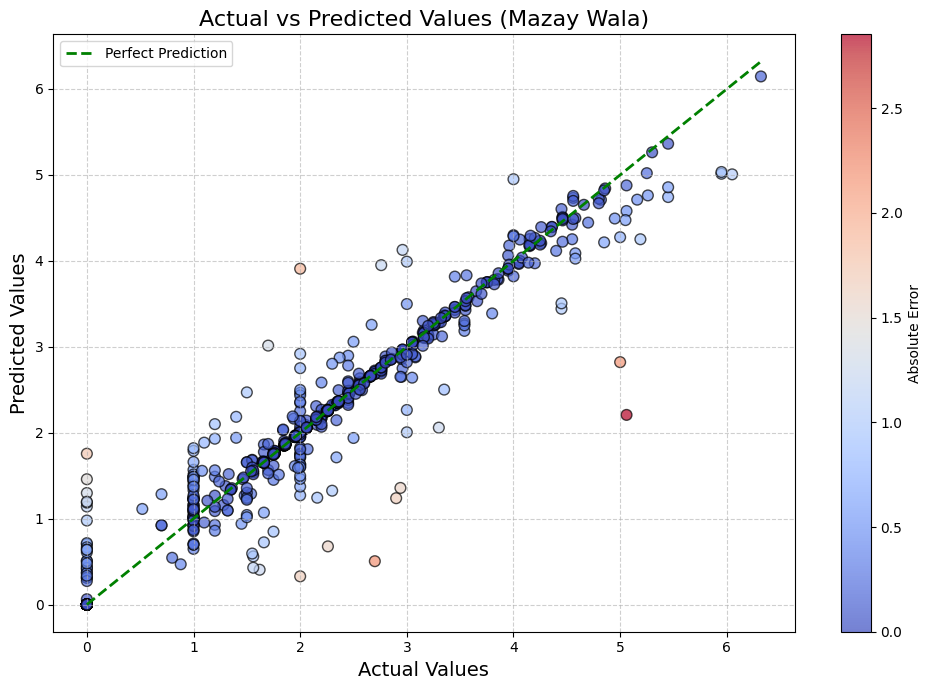

In [19]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    results['Actual'],
    results['Predicted'],
    c=np.abs(results['Actual'] - results['Predicted']),
    cmap='coolwarm',
    s=60,
    alpha=0.7,
    edgecolor='k'
)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values (Mazay Wala)', fontsize=16)
plt.plot(
    [results['Actual'].min(), results['Actual'].max()],
    [results['Actual'].min(), results['Actual'].max()],
    color='green',
    linestyle='--',
    linewidth=2,
    label='Perfect Prediction'
)
plt.colorbar(scatter, label='Absolute Error')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Random Forest as Classifier

In [21]:
# Load dataset
dff = sns.load_dataset("penguins")
print(dff.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
print(dff.isnull().sum().sort_values(ascending=False))

sex                  11
bill_depth_mm         2
bill_length_mm        2
flipper_length_mm     2
body_mass_g           2
island                0
species               0
dtype: int64


In [26]:
print(dff.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [30]:
# Imputing Missing values in our dataset.
# List of columns to impute
cat_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
catt_cols = ["sex"]

# Create the imputer for median and mode
imputer = SimpleImputer(strategy='median')
imputerr = SimpleImputer(strategy="most_frequent")

# Impute each column
dff[cat_cols] = imputer.fit_transform(dff[cat_cols])
dff[catt_cols] = imputerr.fit_transform(dff[catt_cols])

# Check if missing values are filled
print(dff.isnull().sum())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [32]:
# Let's encode the category columns using Label Encoder in for loop.
Le = LabelEncoder()
for col in dff.select_dtypes(include=['category', 'object']):
    dff[col] = Le.fit_transform(dff[col])


In [33]:
# Calculate Q1 and Q3
Q1 = dff.quantile(0.25)
Q3 = dff.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outlier_condition = ~((dff < (Q1 - 1.5 * IQR)) | (dff > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
dff_no_outliers = dff[outlier_condition]

print("Original shape:", dff.shape)
print("Shape after removing outliers:", dff_no_outliers.shape)

Original shape: (344, 7)
Shape after removing outliers: (344, 7)


In [39]:
X = dff_no_outliers.drop("island", axis=1)
y = dff_no_outliers["island"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Let's Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6521739130434783
Precision: 0.6435856146001074
Recall: 0.6521739130434783
F1 Score: 0.6355488922205563
Confusion Matrix:
 [[23  5  3]
 [ 3 20  2]
 [ 1 10  2]]


In [43]:
# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results.head(10))

     Actual  Predicted
194       1          1
157       1          1
225       0          0
208       1          1
318       0          0
329       0          0
319       0          0
260       0          0
114       0          1
220       0          0


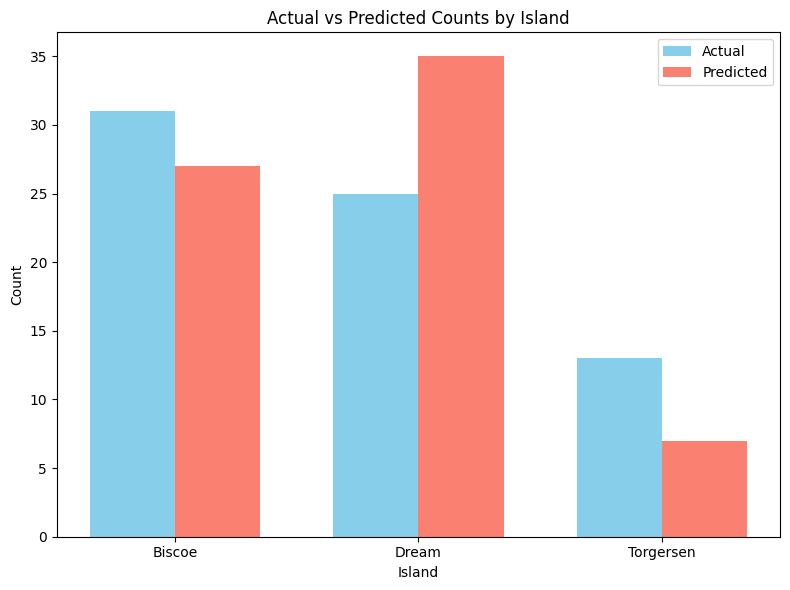

In [47]:
# Example mapping
island_mapping = {0: 'Biscoe', 1: 'Dream', 2: 'Torgersen'}

# Get unique classes
classes = sorted(list(set(results['Actual']).union(set(results['Predicted']))))

# Map class numbers to names for x-axis
class_labels = [island_mapping[c] for c in classes]

# Count occurrences for each class
actual_counts = results['Actual'].value_counts().reindex(classes, fill_value=0)
pred_counts = results['Predicted'].value_counts().reindex(classes, fill_value=0)

bar_width = 0.35
index = np.arange(len(classes))

plt.figure(figsize=(8, 6))
plt.bar(index, actual_counts, bar_width, label='Actual', color='skyblue')
plt.bar(index + bar_width, pred_counts, bar_width, label='Predicted', color='salmon')

plt.xlabel('Island')
plt.ylabel('Count')
plt.title('Actual vs Predicted Counts by Island')
plt.xticks(index + bar_width / 2, class_labels)
plt.legend()
plt.tight_layout()
plt.show()